In [0]:
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD

from sklearn.utils import shuffle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
!wget http://files.grouplens.org/datasets/movielens/ml-20m.zip

--2020-06-11 17:22:07--  http://files.grouplens.org/datasets/movielens/ml-20m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 198702078 (189M) [application/zip]
Saving to: ‘ml-20m.zip.5’

ml-20m.zip.5        100%[===================>] 189.50M  57.3MB/s    in 3.5s    

2020-06-11 17:22:11 (54.4 MB/s) - ‘ml-20m.zip.5’ saved [198702078/198702078]



In [3]:
!unzip -n ml-20m.zip

Archive:  ml-20m.zip


In [4]:
!head ml-20m/movies.csv

movieId,title,genres
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
6,Heat (1995),Action|Crime|Thriller
7,Sabrina (1995),Comedy|Romance
8,Tom and Huck (1995),Adventure|Children
9,Sudden Death (1995),Action


In [5]:
!head ml-20m/links.csv

movieId,imdbId,tmdbId
1,0114709,862
2,0113497,8844
3,0113228,15602
4,0114885,31357
5,0113041,11862
6,0113277,949
7,0114319,11860
8,0112302,45325
9,0114576,9091


In [6]:
df = pd.read_csv("ml-20m/ratings.csv")
df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [7]:
print ("Size of the dataset: {}".format(len(df)))
# Shuffling the dataset
df = df.sample(frac=1.0)
# For saving time making the dataset smaller
df = df[:100000]
print ("Size of the dataset: {}".format(len(df)))

Size of the dataset: 20000263
Size of the dataset: 100000


In [8]:
df.userId = pd.Categorical(df['userId'])
df['new_user_id']= df.userId.cat.codes

df.userId = pd.Categorical(df['movieId'])
df['new_movie_id']= df.userId.cat.codes

df.head()

,userId,movieId,rating,timestamp,new_user_id,new_movie_id
19597492,2161,2161,3.5,1126015001,51136,1717
7869571,2881,2881,3.0,1044463471,20532,2308
796721,6218,6218,4.5,1081844306,2071,4475
4679564,173,173,1.0,841620544,12220,156
4843903,3993,3993,4.0,1002856234,12665,3122


In [0]:
new_user_ids = df['new_user_id'].values
new_movie_ids = df['new_movie_id'].values
rating = df['rating'].values

N = len(set(new_user_ids))
M = len(set(new_movie_ids))

K = 15

In [0]:
u = Input((1,))
m = Input((1,))

u_emb = Embedding(N,K)(u)
m_emb = Embedding(M,K)(m)

u_emb = Flatten()(u_emb)
m_emb = Flatten()(m_emb)

x = Concatenate()([u_emb,m_emb])
x = Dense(1024,activation='relu')(x)
x = Dense(1)(x)

model = Model(inputs=[u,m],outputs=x)

model.compile(
    loss='mse',
    optimizer=Adam(0.01),
)

In [0]:
user_ids,movie_ids,ratings = shuffle(new_user_ids, new_movie_ids, rating)
Ntrain = int(0.9 * len(ratings))
train_user = user_ids[:Ntrain]
train_movies = movie_ids[:Ntrain]
train_ratings = ratings[:Ntrain]

test_user = user_ids[Ntrain:]
test_movie = movie_ids[Ntrain:]
test_ratings = ratings[Ntrain:]

In [12]:
r = model.fit(
    x = [train_user,train_movies],
    y = train_ratings,
    batch_size=64,
    epochs=25,
    validation_data = ([test_user,test_movie],test_ratings)
)

Epoch 1/25
1407/1407 [==============================] - 17s 12ms/step - loss: 1.0923 - val_loss: 0.9923
Epoch 2/25
1407/1407 [==============================] - 16s 11ms/step - loss: 0.7833 - val_loss: 1.0085
Epoch 3/25
1407/1407 [==============================] - 17s 12ms/step - loss: 0.5738 - val_loss: 1.0669
Epoch 4/25
1407/1407 [==============================] - 16s 12ms/step - loss: 0.4542 - val_loss: 1.1171
Epoch 5/25
1407/1407 [==============================] - 16s 12ms/step - loss: 0.3587 - val_loss: 1.0958
Epoch 6/25
1407/1407 [==============================] - 16s 12ms/step - loss: 0.2802 - val_loss: 1.1047
Epoch 7/25
1407/1407 [==============================] - 16s 12ms/step - loss: 0.2223 - val_loss: 1.1131
Epoch 8/25
1407/1407 [==============================] - 16s 12ms/step - loss: 0.1788 - val_loss: 1.1613
Epoch 9/25
1407/1407 [==============================] - 17s 12ms/step - loss: 0.1514 - val_loss: 1.1433
Epoch 10/25
1407/1407 [==============================] - 16s 12m

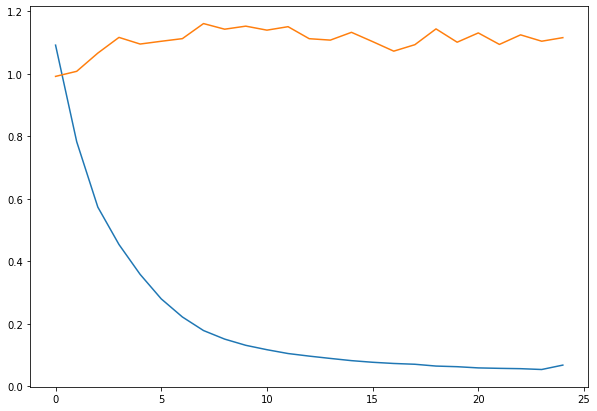

In [13]:
plt.figure(figsize=(10,7))
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.show()